# Pipeline Part 1
1) Clean data and feature engineering
2) Split data into training, validation, query, and testing
3) Set aside validation & query sets (25%, 25%)
4) Dimension reduction of all sets separately


In [1]:
import pandas as pd
from sklearn import model_selection
import sys
import numpy as np
sys.path.insert(0, '/Users/gracewang/Documents/GitHub/elecfinal')
from Data.data_cleaner import cleaner


In [2]:
## Clean data
train_path = "../Data/train_data.csv"
feature_path = "../Data/feature_weights.csv"
morph_path = "../Data/morph_embeddings.csv"
data = cleaner(train_path, feature_path, morph_path)


In [3]:
data.shape

(185832, 27)

In [4]:
## Split data into training, validation, query, and testing
X = data.drop(columns='connected')
y = data['connected']
X_train, X_oth, y_train, y_oth = model_selection.train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_query, y_val, y_query = model_selection.train_test_split(X_oth, y_oth, test_size=0.25, random_state=42)


## Dimension Reduction

### Method Consideration
Avoid:
- nonnegative matrix factorization: we have negative values
- independent component analysis: factors may not be statistically independent; there are correlated features

Consider:
- PCA
- manifold learning: https://scikit-learn.org/stable/modules/manifold.html


In [5]:
from sklearn.manifold import Isomap

In [11]:
model = Isomap(n_components=2, n_neighbors=100)
X_transformed = model.fit_transform(X_train.select_dtypes(include='number'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: >

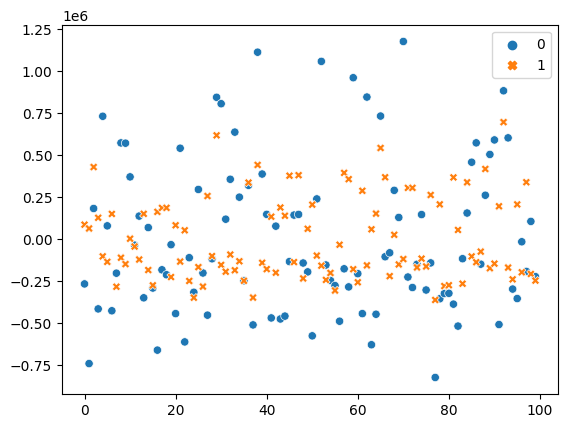